### Load Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix

In [2]:
mnist = fetch_openml('mnist_784')

In [3]:
X = mnist.data
Y = mnist.target

### Analyze Data

In [5]:
#pd.Series(Y).value_counts()

In [4]:
print(X.shape)
print(Y.shape)

(70000, 784)
(70000,)


In [5]:
np.unique(Y)

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

### Split Data

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=.2,random_state=10)

In [8]:
print(xtrain.shape,xtest.shape)

(56000, 784) (14000, 784)


In [9]:
print(ytrain.shape,ytest.shape)

(56000,) (14000,)


### Feature Scaling

In [10]:
print(xtrain.min(),xtrain.max())
print(xtest.min(),xtest.max())

0.0 255.0
0.0 255.0


In [11]:
xtrain_scaled = xtrain/255.0
xtest_scaled = xtest/255.0

In [12]:
print(xtrain_scaled.max(),xtrain_scaled.min())

1.0 0.0


In [13]:
from sklearn.decomposition import PCA

In [14]:
xtrain_scaled.shape

(56000, 784)

In [15]:
pca = PCA(.98)

In [17]:
xtrain_selected = pca.fit_transform(xtrain_scaled)
xtrain_selected.shape

(56000, 260)

In [18]:
xtest_selected = pca.transform(xtest_scaled)
xtest_selected.shape

(14000, 260)

### Train Model

In [19]:
lg = LogisticRegression()
lg.fit(xtrain_selected,ytrain)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [20]:
print("Training Score: ",lg.score(xtrain_selected,ytrain))
print("Testing Score: ",lg.score(xtest_selected,ytest))

Training Score:  0.933625
Testing Score:  0.9202857142857143


### Prediction

In [21]:
pred = lg.predict(xtest_selected)

1


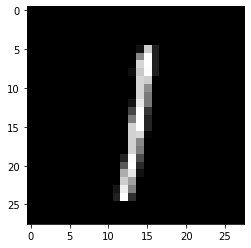

In [22]:
plt.imshow(xtest[100].reshape(28,28),cmap="gray")
print(pred[100])

In [23]:
confusion_matrix(ytest,pred)

array([[1371,    0,    6,    3,    2,   14,   14,    2,    5,    4],
       [   0, 1476,    7,    3,    1,   12,    1,    2,   10,    3],
       [   7,   18, 1284,   27,   12,   11,   23,   20,   29,    7],
       [   4,    3,   31, 1286,    1,   51,    6,   18,   25,   11],
       [   4,    5,   11,    1, 1285,    3,   13,    5,   13,   51],
       [  16,    5,    5,   38,    7, 1094,   35,    6,   35,    7],
       [   5,    3,    9,    0,   12,   25, 1240,    0,    7,    2],
       [   3,    4,   21,   10,   12,    3,    2, 1362,    6,   50],
       [  17,   30,   20,   35,    4,   33,   13,    1, 1202,   17],
       [   7,    5,    6,   15,   29,    8,    0,   39,   10, 1284]],
      dtype=int64)

In [24]:
import os
import cv2
data = []
for file_name in os.listdir('test/'):
    img = cv2.imread('test/'+file_name, 2)
    data.append(cv2.resize(img,(28,28)))
    print(file_name,'imported successfully!')

00.png imported successfully!
a.png imported successfully!
ab.png imported successfully!
t0.png imported successfully!
t01.png imported successfully!
t1.png imported successfully!
t2.png imported successfully!
t21.png imported successfully!
t223.png imported successfully!
t23.png imported successfully!
t3.png imported successfully!
test.png imported successfully!


In [25]:
dataset = np.array(data)

In [26]:
dataset.shape

(12, 28, 28)

In [27]:
final_ds = dataset.reshape(len(dataset), -1)
print(final_ds.shape)

(12, 784)


In [28]:
x_preprocessed = pca.transform(final_ds/255)

In [29]:
x_preprocessed.shape

(12, 260)

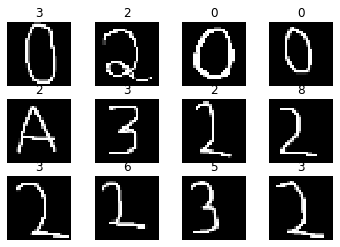

In [30]:
predictions = lg.predict(x_preprocessed)
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(data[i], cmap='gray')
    plt.title(predictions[i])
    plt.axis('off')

In [31]:
import pickle

In [32]:
filename = "model.pkl"
file = open(filename,"wb")
pickle.dump(lg, file)
file.close()
print("model exported successfully!")

model exported successfully!


In [33]:
fl = open('pca.pkl','wb')
pickle.dump(pca,fl)
fl.close()

In [44]:
import tkinter as tk
from tkinter import *
import pickle
import cv2
from PIL import ImageTk,Image
from tkinter import filedialog
import shutil
import wikipedia

root = tk.Tk()
root.title("Hand Written Digit Recognition")
rw = root.winfo_screenwidth()
rh = root.winfo_screenheight()
root.geometry("%dx%d+0+0"%(rw,rh))

top_frame=Frame(root,height=100,bg="gray20",width=rw,bd=5,relief="groove")
top_frame.pack(side="top",fill="both")
lb = Label(top_frame,text="Handwritten Digit Recognition",font=("times new roman",36,"bold"),fg="white",bg="gray20")
lb.pack(fill="both")
left_frame=Frame(root,height=rh,bg="gray87",width=(rw/2),bd=5)
left_frame.pack(fill="both",side='left')
right_frame=Frame(root,height=rh,bg="gray80",width=(rw/2),bd=5)
right_frame.pack(fill="both",side='right')
x = ""
def browse():
    global x
    x = filedialog.askopenfilename()
    img = Image.open(x)
    img = img.resize((250,250))
    im = ImageTk.PhotoImage(img)
    lb = Label(left_frame,image=im)
    lb.image = im
    lb.place(x=250,y=250)


btn = Button(left_frame,text="Browse",width=12,font=("times new roman",20),fg="white",bg = "gray10",activebackground="gray40",command=browse)
btn.place(x=280,y=50)

def predict():
    file = x
    f = open("model.pkl",'rb')
    model = pickle.load(f)
    pca = pickle.load(open('pca.pkl','rb'))
    im=cv2.imread(file,2)
    tst = pca.transform(cv2.resize(im, (28,28)).reshape(1,-1)/255)
    prediction = model.predict(tst)[0]
    lb = Label(right_frame,text="Prediction:",font=("times new roman",24,"bold"),bg="gray80",fg="black")
    lb.place(x=250,y=150)
    lb = Label(right_frame,text = model.predict(tst)[0],font=("times new roman",24,"bold"),bg="gray80",fg="black")
    lb.place(x=470,y=150)
    details = wikipedia.summary(model.predict(tst)[0])    
    lb2 = tk.Text(right_frame,font=("times new roman",14),fg="black",bg="gray80")
    lb2.place(x=10,y=270)
    try:
        page = wikipedia.page(prediction)
        lb2.insert(tk.END, page.summary)
        lb2.configure(state='disabled')
    except:
        pass

btn = Button(right_frame,text="Predict",width=12,font=("times new roman",20),fg="white",bg = "gray10",activebackground="gray40",command=predict)
btn.place(x=280,y=50)

root.mainloop()